# Домашнее задание 2 (20 + 15 + 25 = 60 pts )

## Задача 1 (20 pts)

- (5 pts) Докажите, что $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$, если $\mathrm{vec}(X)$ векторизация матрицы по столбцам. Что и почему изменится, если использовать векторизацию по строкам? 

- (2 pts) Какова сложность наивного вычислени $(A \otimes B) x$ и почему она такова? Покажите, как она может быть снижена.

- (3 pts) Пусть матрицы $A$ и $B$ имеют спектральные разложения $A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$. Найдите собственные векторы и собственные значения у матрицы $A\otimes I + I \otimes B$.

- (10 pts) Пусть $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Оцените аналитически число итераций необходимых для решения линейной системы с матрицей $A$ с относительной точностью $10^{-4}$ используя
    - метод Ричардсона с оптимальным параметром (используйте евклидову норму)
    - метод Чебышёва (используйте евклидову норму)
    - метод сопряжённых градиентов (используйте $A$-норму).
    
и сравните вашу оценку с экспериментальными результатами.

# Место для Вашего решения
- (5 pts) Докажите, что $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$, если $\mathrm{vec}(X)$ векторизация матрицы по столбцам. Что и почему изменится, если использовать векторизацию по строкам?

__Доказательство:__

Пусть матрица $X$ состоит из $n$ столбцов: $x_1, x_2, ..., x_n$. 

$e_1, e_2, ..., e_n$ - столбцы единичной матрицы I

$X = \sum_{j=1}^{n} x_j e_j^T$

--

Заметим следующее: 

$\mathrm{vec}\: ab^T = b \otimes a$ для любых двух векторов $a$ и $b$, так как $j$-ый столбец матрицы $ab^T$ - это $b_j a$, размещая столбцы эти друг под другом, получим $b \otimes a$

--

Используя свойство выше, получим:

$\mathrm{vec}(AXB) = \mathrm{vec} \sum_{j=1}^{n} Ax_je_j^TB = \sum_{j=1}^{n} \mathrm{vec}(Ax_j)(B^T e_j)^T = \sum_{j=1}^{n}(B^T e_j \otimes Ax_j = (B^T \otimes A)\sum_{j=1}^{n}(e_j \otimes x_j) = (B^T \otimes A) \sum_{j=1}^{n} \mathrm{vec} x_j e_j^T = (B^T \otimes A)\, \mathrm{vec}(X)$

В случае векторизации по строкам получим: $ \mathrm{vec}(AXB) = (A \otimes B^T) \, \mathrm{vec}(X)$. 

Так как это будет векторизация по столбцам матрицы $(AXB)^T = B^T X^T A^T$. Используя полученное равенство, имеем  $\mathrm{vec} \: B^T X^T A^T = (A \otimes B^T) \, \mathrm{vec}(X^T) = (A \otimes B^T) \, \mathrm{vec}(X)$

Последнее равенство в силу того, что $\mathrm{vec}\: a^T = \mathrm{vec}\: a = a$ для любого вектора $a$

Таким образом, $ \mathrm{vec}(AXB) = (A \otimes B^T) \, \mathrm{vec}(X)$

- (2 pts) Какова сложность наивного вычислени $(A \otimes B) x$ и почему она такова? Покажите, как она может быть снижена.

__Решение:__

Пусть матрица $A$ имеет размеры $m \times n$ и $B$ - $p \times q$, $x$ - $nq \times  1$

Используя наивные вычисления мы бы затратили $O(nmpq)$ на вычисление кронекирова произведения и $O(pq^2n^2m)$ на умножение итоговой матрицы на вектор, то есть, итоговая сложность $O(pq^2n^2m)$.

Но эту операцию можно ускорить, если использовать векторизацию.

Распишем кронекерово произведение: 

$ y = (A\otimes B)x = \begin{bmatrix}a_{11}B & \dots & a_{1n}B \\ \vdots & \ddots & \vdots \\ a_{m1}B & \dots & a_{mn}B\end{bmatrix} \begin{bmatrix} x_1 \\ \vdots \\ x_{m}\end{bmatrix}$, где $x_i \in \mathrm{R_q}$

Перепишем это так: $\begin{bmatrix} y_1 \\ \vdots \\ y_{m}\end{bmatrix} = \begin{bmatrix}a_{11}B x_1 + \dots + a_{1n}B x_n \\ \vdots \\ a_{m1}B x_1 + \dots + a_{mn}B x_n\end{bmatrix}$

И распишем $i$-ую компоненту: 

$y_i = B \begin{bmatrix} x_1 \dots x_n  \end{bmatrix} \begin{bmatrix} a_{i1} \\ \vdots \\ a_{in}\end{bmatrix}$

Тогда $Y =\begin{bmatrix} y_1 \dots y_m  \end{bmatrix} = \begin{bmatrix}BXa_1 & BXa_2 \dots BXa_m \end{bmatrix} = BX\begin{bmatrix}a_1 & a_2 \dots a_m \end{bmatrix} = BXA^T$

То есть, мы получили, что $ y = (A\otimes B)x = \mathrm{vec}(BXA^T)$

Следовательно, теперь мы затратим $O(npq + qnm)$, что значительно лучше.

- (3 pts) Пусть матрицы $A$ и $B$ имеют спектральные разложения $A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$. Найдите собственные векторы и собственные значения у матрицы $A\otimes I + I \otimes B$.

__Решение:__

--

Заметим, что единичную матрицу можно записать в виде: $I = S_A I S_A^{-1} = S_B I S^{-1}_B$

А также $(A \otimes B)^{-1} = A^{-1} \otimes B^{-1}$

--

Тогда: 

$A\otimes I + I \otimes B = (S_A\Lambda_A S_A^{-1}) \otimes (S_B I S^{-1}_B) +  (S_A I S_A^{-1})\otimes (S_B\Lambda_B S^{-1}_B) = (S_A \otimes S_B)\times (\Lambda_A \otimes I) \times (S_A^{-1} \otimes S_B^{-1}) + (S_A \otimes S_B)\times (I \otimes \Lambda_B) \times (S_A^{-1} \otimes S_B^{-1}) = (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B) \times (S_A^{-1} \otimes S_B^{-1}) = (S_A \otimes S_B)(\Lambda_A \otimes I + I \otimes \Lambda_B) \times (S_A \otimes S_B)^{-1}$

То есть, таким образом, мы имеем спектральное разложение $A\otimes I + I \otimes B$. 

На диагонали $\Lambda_A$ лежат собственные значения матрицы $A$ обозначим их $\lambda_1^A, ..., \lambda_n^A$, на диагонали $\Lambda_B$ лежат собственные значения матрицы $B$ обозначим их $\lambda_1^B, ..., \lambda_n^B$ (размеры матриц $n \times n$). Столбцы матрицы $S_A = [s_1^A, ..., s_n^A]$ - собственные векторы $A$, столбцы матрицы $S_B = [s_1^B, ..., s_n^B]$ - собственные векторы $B$.

Таким образом получаем, исходя из полученного выше спектального разложения, что собственные значения $\lambda_i^A + \lambda_j^B, \: \forall i,j $, а собственные векторы - это  $s_i^A \otimes s_j^B, \: \forall i,j $, где $i = \overline{1,n}$, $j = \overline{1,n}$

- (10 pts) Пусть $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Оцените аналитически число итераций необходимых для решения линейной системы с матрицей $A$ с относительной точностью $10^{-4}$ используя
    - метод Ричардсона с оптимальным параметром (используйте евклидову норму)
    - метод Чебышёва (используйте евклидову норму)
    - метод сопряжённых градиентов (используйте $A$-норму).
    
и сравните вашу оценку с экспериментальными результатами.

__Решение:__

- метод Ричардсона

Оптимальным параметром является: $\tau_{opt} = \frac{2}{\lambda_{min} + \lambda_{max}}$ (было показано на лекции и семинаре).

У диагональной матрицы собственные значения расположены на диагонали, следовательно, $\lambda_{min} = \frac{1}{1000}, \lambda_{max} = 1000$. 

Таким образом, $cond(A) = \frac{\lambda_{max}}{\lambda_{min}}=10^6$. Данная матрица плохо обусловлена. 

На лекции было показано, что $||e_k||_2 \leq q^k ||e_0||_2 $, где $q = \frac{cond(A)-1}{cond(A)+1}$

Относительная ошибка $\epsilon = \frac{||e_k||_2}{||e_0||_2} = 10^{-4}$ (согласно условию), тогда получаем, что $(\frac{10^6-1}{10^6+1})^k = 10^{-4}$, откуда $k \approx 4605000$ итераций.


Maximum eigenvalue = 1000.0, minimum eigenvalue = 0.001
Condition number = 1000000.0
Число итераций:  3051269


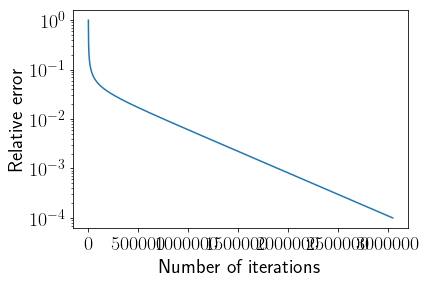

In [225]:
# метод Ричардсона

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("text", usetex=True)
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg as spla
import scipy
from scipy.sparse import csc_matrix

n = 1001
a = np.arange(1/1000, 1.000001, 1/1000)
a = np.append(a, 1000)
A = np.diag(a)
rhs = np.ones(n)

eig_val = np.linalg.eigvals(A)
lam_max = eig_val[eig_val.shape[0]-1]
lam_min = eig_val[0]

tau_opt = 2.0/(lam_max + lam_min)

fig, ax = plt.subplots()
plt.close(fig)

niters = 4606000
x = np.zeros(n)
res_richardson = []

rr = A.dot(x) - rhs
x = x - tau_opt * rr
err_0 = np.linalg.norm(rr)

i=0
err = 1
while (err > 0.0001) and (i <=niters):
    rr = A.dot(x) - rhs
    x = x - tau_opt * rr
    err = np.linalg.norm(rr)/err_0
    res_richardson.append(err)
    i+=1

#Convergence of an ordinary Richardson (with optimal parameter)
plt.plot(res_richardson)
plt.yscale("log")
plt.xlabel("Number of iterations", fontsize=20)
plt.ylabel("Relative error", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
print("Maximum eigenvalue = {}, minimum eigenvalue = {}".format(lam_max, lam_min))
print("Condition number = {}".format(lam_max.real / lam_min.real))

print("Число итераций: ", len(res_richardson))

Полученный экспериментальный результат хорошо согласуется с теоретическим

- метод Чебышёва

На лекции было показано, что $||e_k||_2 \leq C q^k ||e_0||_2 $, где $q = \frac{\sqrt{cond(A)}-1}{\sqrt{cond(A)}+1}$

Относительная ошибка $\epsilon = \frac{||e_k||_2}{||e_0||_2} = 10^{-4}$ (согласно условию), тогда получаем, что $(\frac{10^3-1}{10^3+1})^k = 10^{-4}$, откуда $k \approx 4606$ итераций.

Число итераций:  5603


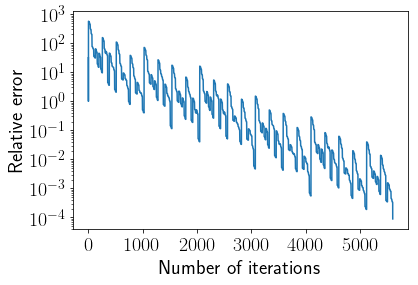

In [231]:
# метод Чебышёва

niters = 8192
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
taus = [(lam_max + lam_min - (lam_min - lam_max) * r) / 2 for r in roots]
x = np.zeros(n)
r = A.dot(x) - rhs
err_0_ = np.linalg.norm(r)
res_cheb = [err_0_]

def good_shuffle(idx):
    if len(idx) == 1:
        return idx
    else:
        new_len = int(np.ceil((len(idx) / 2)))
        new_idx = good_shuffle(idx[:new_len])
        res_perm = []
        perm_count = 0
        for i in new_idx:
            res_perm.append(i)
            perm_count += 1
            if perm_count == len(idx):
                break
            res_perm.append(len(idx) + 1 - i)
            perm_count += 1
            if perm_count == len(idx):
                break
        return res_perm

# делаем перестановку, чтобы метод был устойчивым (норма произведения должна быть маленькой)
good_perm = good_shuffle([i for i in range(1, niters+1)])

i=0
err = 1
while (err > 0.0001) and (i <=niters):
    x = x - 1.0/taus[good_perm[i] - 1] * r
    r = A.dot(x) - rhs
    err = np.linalg.norm(r)/err_0_
    res_cheb.append(err)
    i+=1
    
plt.semilogy(res_cheb, label="Chebyshev")
plt.xlabel("Number of iterations", fontsize=20)
plt.ylabel("Relative error", fontsize=20)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)
print("Число итераций: ", len(res_cheb))


Число итераций в эксперименте хорошо согласуется с теоретическим расчетом.

- метод сопряжённых градиентов

На лекции была получена оценка относительной ошибки: $\frac{\Vert x - x_* \Vert_A }{\Vert x_* \Vert_A} \leq \inf_{q, q(0)=1} \max_{j} |q({\lambda_j})|$

В данном случае у нас 1001 различных собственных значений, однако 1000 распределены равномерно, а одно (1000) сильно выбивается. 

Теоретическая оценка на число сходимости $k = 1001$, так как столько различных собственных значений.

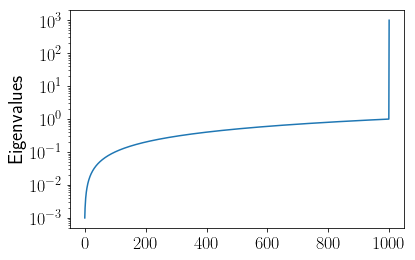

In [85]:
# собственные значения A

eigs = np.linalg.eigvals(A)
plt.semilogy(np.unique(eigs))
plt.ylabel("Eigenvalues", fontsize=20)
plt.xticks(fontsize=18)
_ = plt.yticks(fontsize=18)

Число итераций:  133


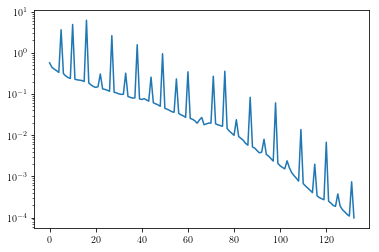

In [86]:
import scipy.sparse.linalg as spsplin
res_hist = []
def callback(x):
    res_hist.append(np.linalg.norm(A @ x - b) / np.linalg.norm(b))

_, eigvec = np.linalg.eigh(A)
#b = eigvec[:, 0]
b = np.random.randn(n)
x, info = spsplin.cg(A, b, x0=b, maxiter=n, tol=1e-4, callback=callback)

plt.semilogy(res_hist)
print("Число итераций: ", len(res_hist))

Число итераций в эксперименте оказалось даже значительно ниже, чем теоретическая оценка.

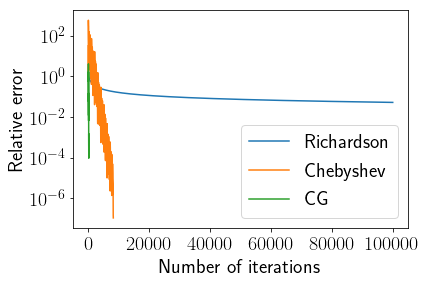

In [76]:
# три метода на одном графике

plt.semilogy(res_richardson, label="Richardson")
plt.semilogy(res_cheb, label="Chebyshev")
plt.semilogy(res_hist, label="CG")
plt.legend(fontsize=20)
plt.xlabel("Number of iterations", fontsize=20)
plt.ylabel("Relative error", fontsize=20)
plt.xticks(fontsize=20)
_ = plt.yticks(fontsize=20)

Как видно из графика, что метод Ричардсона самый долгий (3051269 итераций), затем следует Чебышёва (5603 итераций), и самый быстрый - метод сопряженных градиентов (133 итерации), причем крайне намного. 

## Задача 2 (15 pts)

### Спектральное разбиение графа и обратная итерация


Дан связный граф $G$ и соответствующий ему лапласиан $L = D - A$ с собственными значениями  $0=\lambda_1, \lambda_2, ..., \lambda_n$, где $D$ диагональная матрица со степенями вершин на диагонали, а $A$ – матрица смежности.
Вектор Фидлера – это собственный вектор, соответствующий собственному значению $\lambda_2$ матрицы $L$. Этот вектор может быть использован для разбиения графа: положительные значения соответствуют одной части графа, отрицательные – другой.

## Метод обратной итерации

Для поиска вектора Фидлера мы будем использовать метод Релея.

* (5 pts) Выпишите матрицу ортопроектора на подпространство ортогональное собственному вектору матрице $L$, соответствующему собственному значению $0$ и докажите (аналитически), что это действительно ортопроектор.
 
* (5 pts) Реализуйте функцию спектрального разделения графа ```partition```:

# Место для Вашего решения
* (5 pts) Выпишите матрицу ортопроектора на подпространство ортогональное собственному вектору матрице $L$, соответствующему собственному значению $0$ и докажите (аналитически), что это действительно ортопроектор.

__Решение:__

Пусть $\psi_1$ - собственный вектор матрицы $L$, соответствующий собственному значению $\lambda_1=0$.

--

Для начала докажем следующее утверждение: 

Если $P$ - ортпроектор на подпространство $U$, то $I-P$ - ортпроектор на ортогональное дополнение к $U$: $U^{\perp}$.

Доказательство: 

$U=Im(P)$

Пусть $U$ - подпространство $V$, тогда для $\forall x \in V$:

$x = Px \oplus (x-Px) = Px \oplus (I-P)x$, где $Px \in U$, $(I-P)x \in U^{\perp}$

Следовательно, $I-P$ - ортогональный проектор на $U^{\perp}$.

--

Заметим, что $P = \frac{\psi_1*\psi_1^T}{\psi_1^T*\psi_1} $ - ортпроектор на собственный вектор $\psi_1$, тогда, согласно утверждению выше, получим, что матрица ортопроектора на подпространство ортогональное собственному вектору $\psi_1$: $I - \frac{\psi_1*\psi_1^T}{\psi_1^T*\psi_1}$

Докажем, что $P = \frac{\psi_1*\psi_1^T}{\psi_1^T*\psi_1} $ - действительно ортпроектор, тогда, согласно утверждению выше, будет следовать, что и $I - \frac{\psi_1*\psi_1^T}{\psi_1^T*\psi_1}$ - тоже ортпроектр, причем как раз на на подпространство ортогональное собственному вектору матрице $L$.

$P^2 = \frac{\psi_1*\psi_1^T}{\psi_1^T*\psi_1} * \frac{\psi_1*\psi_1^T}{\psi_1^T*\psi_1} = \frac{\psi_1*\psi_1^T}{\psi_1^T*\psi_1} = P$

И покажем, что образ и ядро оператора ортогональны.

Пусть $U$ - образ оператора, то есть $\forall u \in U: Pu = u$, а $V$ - ядро оператора: $\forall v \in V: Pv = 0$

Действительно, в данном случае образом оператора является первый собственный вектор $\psi_1$, а ядром оператора - собственные векторы, соответствующие другим собственным значениям, а собственные векторы, отвечающие различным собственным значениям - ортогональны, что и требовалось доказать. 

Таким образом, матрица ортопроектора на подпространство ортогональное собственному вектору матрице $L$: $I - \frac{\psi_1*\psi_1^T}{\psi_1^T*\psi_1}$ 

In [20]:
import numpy as np
import scipy.sparse.linalg as spsplin
import scipy.sparse as spsp
from scipy.sparse.csr import csr_matrix
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (float)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):

    x = x0.copy()
    A_ = csr_matrix.copy(A)

    
    eigs = []
    n = A.shape[0]
    
    # фиксированный сдвиг
    
    # проецироание
    t = np.matrix(x)
    T = csr_matrix(t.T * t)
    P = spsp.eye(n) - T + A_ @ T
    x = P.dot(x) 
    
    splu = spsplin.splu(A_ - shift * np.eye(n))
    x = splu.solve(x)
    x = x / np.linalg.norm(x)
    
    lam_prev = (x @ A_ @ x) / (x @ x)
    eigs.append(lam_prev)
    
    for i in range(1, num_iter_fix):
        t = np.matrix(x)
        T = csr_matrix(t.T * t)
        P = spsp.eye(n) - T + A_ @ T
        x = P.dot(x)
        
        x = splu.solve(x)
        x = x / np.linalg.norm(x)
        lam_next = (x @ A_ @ x) / (x @ x)
        
        eigs.append(lam_next)
        
        if np.linalg.norm(lam_prev - lam_next)/np.linalg.norm(lam_next) <= eps:
            break
        lam_prev = lam_next
        
    
    # адаптивный сдвиг
    for i in range(1, num_iter_adapt):       
        
        t = np.matrix(x)
        T = csr_matrix(t.T * t)
        P = spsp.eye(n) - T + A_ @ T
        x = P.dot(x)
        
        # корректируем сдвиг
        shift_adapt = x.T @ A @ x
        
        splu = spsplin.splu(A_ - shift_adapt * np.eye(n))        
        x = splu.solve(x)
        x = x / np.linalg.norm(x) 
        lam_next = (x @ A_ @ x) / (x @ x)
        
        eigs.append(lam_next)
        
        if np.linalg.norm(lam_prev - lam_next)/np.linalg.norm(lam_next) <= eps:
            break
        
        lam_prev = lam_next   
        x_prev = x
    
    return x, np.sort(np.asarray(eigs))

Алгоритм должен останавливаться спустя `num_iter_fix + num_iter_adapt` итераций или если выполнено следующее соотношение

$$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ на некотором шаге } k.$$

Не забудьте использовать ортогональную проекцию из задачи выше в итерационном процессе, чтобы получить верный собственный вектор.
Также хорошей идеей могло быть использование ```shift=0``` до запуска адаптивного режима. Однако это невозможно в силу вырождннности матрицы $L$, а разреженное разложенное в ```scipy``` не работет в этом случае. Поэтому вместо нулевого сдвига предлагается использовать некоторое малое значение.

* (3 pts) Сгенерируйте случайный `lollipop_graph`, используя библиотеку `networkx`, и найдите его разбиение. [Нарисуйте](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) этот граф с вершинами, окрашенными в соответствии с разбиением.

* (2 pts) Запустите метод со случайного начального приближение ```x0```, установите ```num_iter_fix=0``` и объясните, почему метод может сойтись к неверному собственному значению?

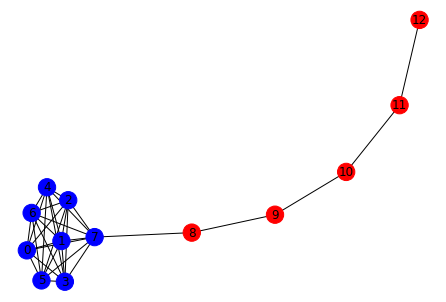

In [31]:
# отрисовка графа с вершинами, окрашенными в соответствии с разбиением

import matplotlib.pyplot as plt
import networkx as nx

n = np.random.randint(3, 10)
m = np.random.randint(3, 10)

G = nx.lollipop_graph(n, m)

A = nx.laplacian_matrix(G)

x_0 = np.random.randn(A.shape[0])

shift = .01
num_iter_fix = 100
num_iter_adapt = 100
eps = 1e-6

pinvit_eigvec, eigs = partition(A, shift, num_iter_fix, num_iter_adapt, x_0, eps)

color_map = []

for el in pinvit_eigvec:
    if el > 0:
        color_map.append('blue')
    else:
        color_map.append('red')

nx.draw(G, node_color=color_map, with_labels=True)

plt.axis('off')

plt.show()

In [29]:
# запуск алгоритма со случайного приближения

x0 = np.random.randn(A.shape[0])

num_iter_fix = 0
num_iter_adapt = 100

pinvit_eigvec, eigs = partition(A, shift, num_iter_fix, num_iter_adapt, x_0, eps)

true_eigval, true_eigvec = np.linalg.eigh(A.toarray())

print("Верное собственное значение: ", true_eigval[1])
print("Полученное собственное значение: ", eigs[-1])

Верное собственное значение:  0.2774068956782044
Полученное собственное значение:  6.054785914561717


Как видно, полученное собственное значение совсем не согласуется с истинным. 

Переменный сдвиг необходимо включать тогда, когда уже получена грубая сходимость, так как сдвиг должен быть близок к целевому собственному значению. А когда мы стартуем со случайного вектора и делаем переменный сдвиг, то метод может сойтись к случайному числу, вовсе не являющимся искомым собственным значением. 

## Задача 3 (25 pts)

## PageRank для DBLP


#### Введение дэмпфирующего фактора

* (5 pts) Напишите функцию ```pagerank_matrix(G)```, которая из поданной на вход матрицы смежности $G$ (в плотном или разреженном форматах) создаёт и возвращает матрицу PageRank'a $A$.

In [32]:
# INPUT:  G - np.ndarray or sparse matrix
# OUTPUT: A - np.ndarray (of size G.shape) or sparse matrix
import numpy as np
from scipy.sparse.csr import csr_matrix
def pagerank_matrix(G):

    if type(G) == csr_matrix:
        rsums = np.array(csr_matrix.sum(G, axis=0)).flatten()
        G.data = G.data / rsums[G.indices]
    else:
        rsums = np.count_nonzero(G, axis=0)
        ind_non_zero = np.where(rsums!=0)[0]
        for el in ind_non_zero:
            G[:, el] = G[:, el] / rsums[el]
            
    return G

* (5 pts) Реализуйте степенной метод для заданной матрицы $A$, начального вектора $x_0$ и числа итераций```num_iter``` в соответствии с прототипом ниже. Функция возвращает оценку собственного вектора, собственного значения и нормы невязки при сходимости. Проверьте, что ваша реализация сходится для матрицы $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$.

In [33]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive)
# OUTPUT: x - np.ndarray (of size x0), l - float, res - np.ndarray (of size num_iter + 1 [include initial guess])
def power_method(A, x0, num_iter): # 5 pts
    x = x0.copy()
    res = []
    for i in range(num_iter):
        x = A @ x
        x = x / np.linalg.norm(x)
        np.append(res, x)
        l = x @ (A @ x)
        res.append(np.linalg.norm(A @ x - l * x))
    return x, l, np.asarray(res)

In [34]:
# демонстрация корректности работы степенного метода

A = np.array([[2, -1], [-1, 2]])
x0 = np.random.randn(2)
num_iter = 100
max_eigvec, max_eigval, conv = power_method(A, x0, num_iter)
true_eigvals, true_eigvec = np.linalg.eigh(A)

print("Полученный собственный вектор: ", max_eigvec)
print("Истинный собственный вектор: ", true_eigvec[::-1][0])
print("Полученное собственное значение: ", max_eigval)
print("Истинное собственное значение: ",true_eigvals[::-1][0])

Полученный собственный вектор:  [-0.70710678  0.70710678]
Истинный собственный вектор:  [-0.70710678  0.70710678]
Полученное собственное значение:  3.0
Истинное собственное значение:  3.0


Для избежания проблем со сходимостью степенного метода, обсуждённых на семинаре, можно ввести дэмпфирующий фактор и преобразовать матрицу PageRank'a следующим образом:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

где $d$ малый параметр из отрезка $[0,1]$ (обычно $d=0.85$), который называется **демпфирующим фактором**, $A$ размера $N\times N$. После такого преобразования максимальное собственное значение матрицы $A_d$ обладает кратностью равной 1. 

Именно это [предложили](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) сделать Ларри Пейдж и Сергей Брин для получения своего алгоритма ранжирвания веб-страниц.


* (4 pts) Реализуйте функцию быстрого умножения матрицы $A_d$ на вектор в соответствии с прототипом ниже ```pagerank_matvec(A, d, x)```. На вход функция принимает  матрицу PageRank'a $A$ (в разреженном формате, например ```csr_matrix```), демпфирующий фактор $d$ и начальный вектор $x$, а возвращает $A_dx$. 

In [35]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)
def pagerank_matvec(A, d, x): # 2 pts
    
    # введение дэмпфирующего фактора
    n = A.shape[0]
    
    # реализация быстрого умножения матрицы на вектор
    
    # сначала умножаем матрицу A на вектор x
    y = A @ x
            
    # умножаем добавку на вектор x
    y_add = np.repeat(np.sum(x), n)
            
    y = d*y + (1-d)/n*y_add
    
    return y

In [51]:
# (2 pts) 
# сравнение времени работы pagerank_matvec и явного вычисления 

import scipy.sparse as ss

n = 10000
A = ss.random(n, n, density=10**(-4), format='csr', dtype='i')
x = np.random.randint(0, 100, size=n)
d = 0.85
%timeit (d*A + (1-d)/n*csr_matrix(np.ones((n,n)))) @ x
%timeit pagerank_matvec(A, d, x)

4.28 s ± 49.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
141 µs ± 154 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Как видно, при использовании функции был получен выигрыш по времени, более, чем в 30000 раз!

* (2 pts) Сгенерируйте случайную матрицу смежности $1000 \times 1000$ (если помещается в память, то увеличьте размер до $10000 \times 10000$) со 100 ненулевыми элементами и сравните время вычисления произведения матрицы и случайного вектора с помощью ```pagerank_matvec``` и явным вычислением $A_dx$.
    
Загрузите данные [отсюда](https://goo.gl/oZVxEa), разархивируйте и поместите файлы `dblp_authors.npz`  и `dblp_graph.npz` в папку рядом с этим ноутбуком. Каждое значение (имя автора) из `dblp_authors.npz` соответствует строке/столбцу в матрице из  `dblp_graph.npz`. Значения в строке `i` и столбце `j` матрицы `dblp_graph.npz` соответствуют числу раз, которое автор `i` цитировал статьи автора `j`. Давайте теперь найдём наиболее влиятельных авторов по величине Pagerank'a на основе данных DBLP.

* (5 pts) Загрузите взвешенную матрицу смежности и список авторов с помощью функции ```load_dblp(...)```. Выведите её плотность, то есть отношение числа ненулевых элементов к общему числу элементов. Найдите top-10 наиболее цитируемых авторов по значениям элементов этой матрицы. Далее сделайте все элементы равными 1 для простоты. Получите матрицу Pagerank'a из матрицы смежности и проверьте её стохастичность (сумма элементов по строкам/столбцам равна 1).
 
* (1 pts) Для того чтобы передать функцию ```pagerank_matvec``` в функцию ```power_method``` для быстрого вычисления матрично-векторного произведения $A_dx$, вы можете сделать ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Вызов ```L@x``` или ```L.dot(x)``` будет реализован путём вызова функции ```pagerank_matvec(A, d, x)```, таким образом, вы можете передать $L$ вместо матрицы $A$ в функцию ```power_method``` напрямую.


* (2 pts) Запустите степенной метод начиная с вектора из всех 1 и нарисуйте норму невязок $\|A_dx_k - \lambda_k x_k\|_2$  как функцию от $k$ для $d=0.85$.


* (1 pts) Выведите имена top-10 авторов по величине PageRank'a на основании графа DBLP с $d=0.85$. Прокомментируйте результат и сарвните его со списком наиболее цитируемых авторов.

In [38]:
# (5 pts)

from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

In [39]:
# плотность матрицы

non_zero = csr_matrix.nonzero(G)[0].shape[0]
print('Плотность матрицы: ', non_zero / G.shape[0]**2)

Плотность матрицы:  4.4986518152305776e-05


In [40]:
# топ-10

rsums = np.array(csr_matrix.sum(G, axis=1)).flatten()
best_ind = rsums.argsort()[-10:][::-1]
best_authors = authors[best_ind]
print('Самые цитируемые: ')
for el in best_authors:
    print(el, sep='\n')

Самые цитируемые: 
Wei Wang
Lei Zhang
Yang Liu
Wei Zhang
Jun Wang
Dacheng Tao
Philip S. Yu
Lei Wang
Wei Li
Jun Zhang


In [41]:
# матрица Pagerank'a

#  делаем все элементы ненулевые равными 1

G = csr_matrix(G, dtype=bool)
G = csr_matrix(G, dtype=int)
A = pagerank_matrix(G)

In [43]:
# (1 pts)

import scipy.sparse.linalg as ssl
d=0.85
L = ssl.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))

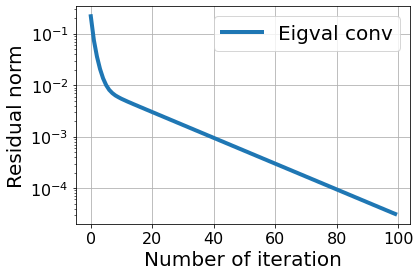

In [44]:
# (2 pts)

import matplotlib.pyplot as plt
x0 = np.ones(A.shape[1])
num_iter = 100
max_eigvec, max_eigval, conv = power_method(L, x0, num_iter)
plt.plot(conv, linewidth=4, label="Eigval conv")
plt.legend(fontsize=20)
plt.yscale("log")
plt.ylabel("Residual norm", fontsize=20)
plt.yticks(fontsize=16)
plt.xlabel("Number of iteration", fontsize=20)
plt.xticks(fontsize=16)
plt.grid(True)

In [52]:
best_ = max_eigvec.argsort()[-10:][::-1]

In [47]:
best_authors_pagerank = authors[best_]
print('Top-10 авторов по величине PageRank: ')
for el in best_authors_pagerank:
    print(el, sep='\n')

Top-10 авторов по величине PageRank: 
Wei Wang
Yang Liu
Wei Zhang
Wei Li
Lei Wang
Athanasios V. Vasilakos
Lei Zhang
Jun Zhang
Jun Wang
Li Li


In [48]:
print('Самые цитируемые: ')
for el in best_authors:
    print(el, sep='\n')

Самые цитируемые: 
Wei Wang
Lei Zhang
Yang Liu
Wei Zhang
Jun Wang
Dacheng Tao
Philip S. Yu
Lei Wang
Wei Li
Jun Zhang


In [49]:
# пересечение имен top-10 авторов по величине PageRank'a и списка наиболее цитируемых авторов

set(best_authors) & set(best_authors_pagerank)

{'Jun Wang',
 'Jun Zhang',
 'Lei Wang',
 'Lei Zhang',
 'Wei Li',
 'Wei Wang',
 'Wei Zhang',
 'Yang Liu'}

Как видно, топ-10 авторов хорошо коррелируют по двум расчетам: 8 из 10 авторов совпадают. 